# Logistic Regression

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

from mpl_toolkits.mplot3d import Axes3D 
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

import pickle

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('classic')

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:>

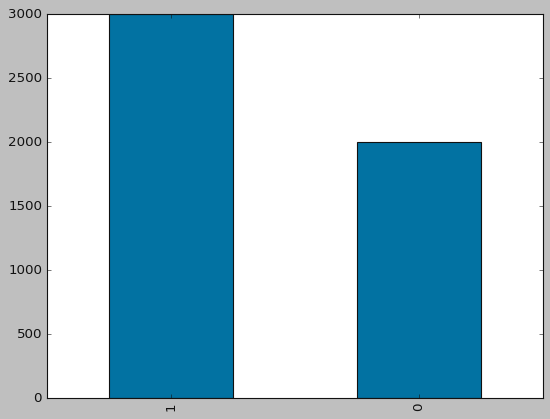

In [7]:
df['test_result'].value_counts().plot.bar()

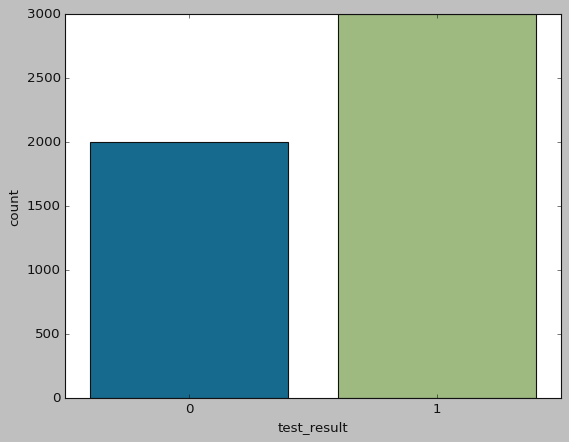

In [8]:
sns.countplot(df['test_result']);

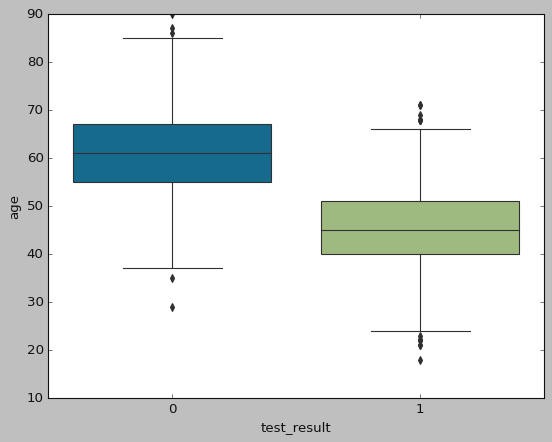

In [9]:
sns.boxplot(x='test_result',y='age',data=df);

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

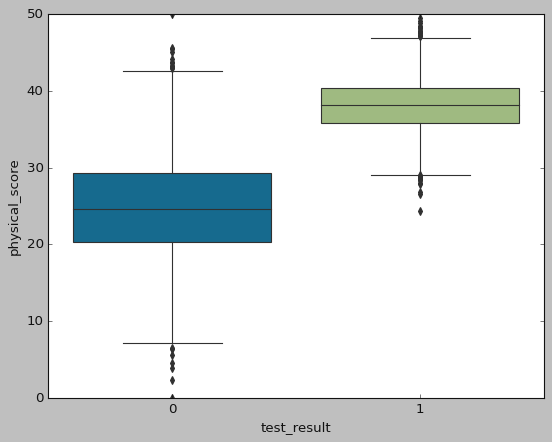

In [10]:
sns.boxplot(x='test_result',y='physical_score',data=df)

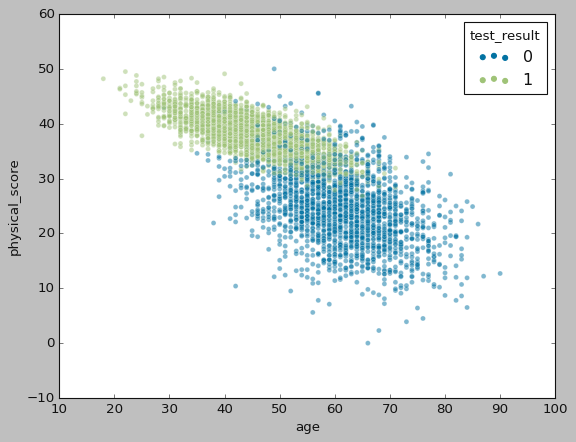

In [11]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5);

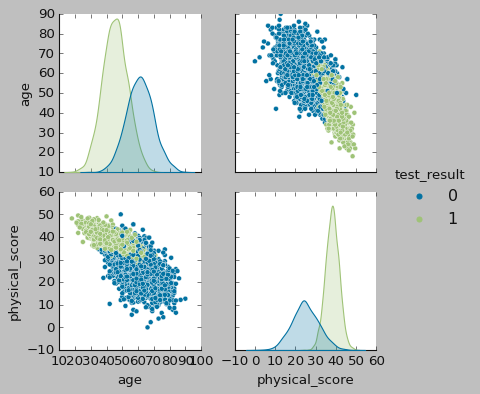

In [12]:
sns.pairplot(df,hue='test_result');

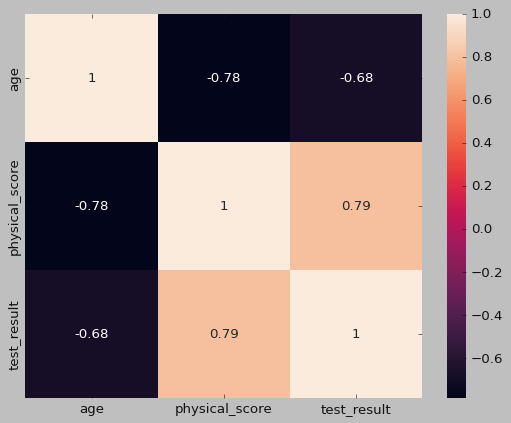

In [13]:
sns.heatmap(df.corr(), annot=True);

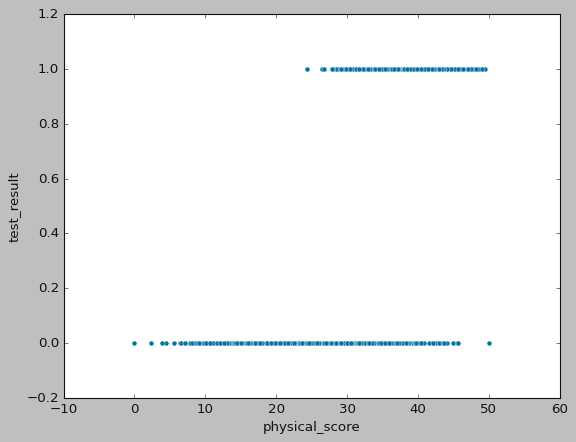

In [14]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

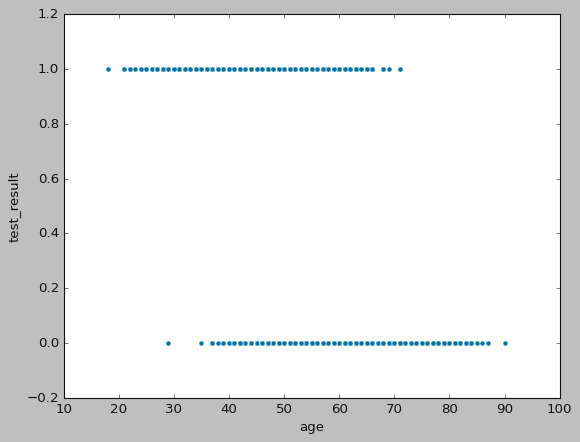

In [15]:
sns.scatterplot(x='age',y='test_result',data=df);

Easily discover new plot types with a google search! Searching for "3d matplotlib scatter plot" quickly takes you to: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

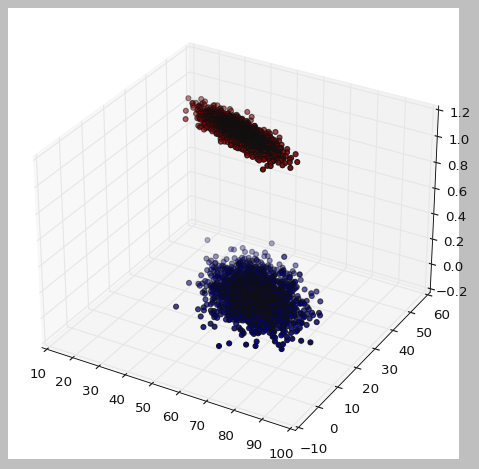

In [16]:
# Burayı manuel oluştur, googla'da "3d matplotlib scatter plot" diye arat,
# kodu bul ve kendine uyarla, önce "c" parametresini kullanma sonra ekle
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])
plt.tight_layout();

In [17]:
# pip install plotly

https://plotly.com/python/3d-scatter-plots/

In [18]:
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='physical_score', z='test_result', color='test_result')
fig.show()

## Train | Test Split and Scaling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Scaling

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [24]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# help(LogisticRegression)

In [25]:
log_model = LogisticRegression()

In [26]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [28]:
log_model.intercept_

array([0.48867341])

In [29]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [30]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [31]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [32]:
# X_test + y_yest + y_pred + y_pred_proba

In [33]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
4770,46.000,37.700,1
188,59.000,36.500,1
3335,54.000,22.800,0
4583,58.000,20.500,0


In [34]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.025
...,...,...,...,...
4770,46.000,37.700,1,0.956
188,59.000,36.500,1,0.813
3335,54.000,22.800,0,0.019
4583,58.000,20.500,0,0.005


In [35]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.025,0
...,...,...,...,...,...
4770,46.000,37.700,1,0.956,1
188,59.000,36.500,1,0.813,1
3335,54.000,22.800,0,0.019,0
4583,58.000,20.500,0,0.005,0


In [36]:
test_data.sample(10)

,age,physical_score,test_result,pred_proba,pred
3820,67.000,20.500,0,0.002,0
1807,41.000,41.600,1,0.994,1
1656,62.000,20.100,0,0.003,0
2186,44.000,37.300,1,0.956,1
1864,66.000,26.200,0,0.030,0
4007,49.000,33.200,0,0.714,1
83,51.000,35.500,1,0.848,1
2143,49.000,28.900,0,0.287,0
3075,48.000,33.000,1,0.714,1
2777,52.000,27.600,0,0.152,0


## Model Performance on Classification Tasks

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [38]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

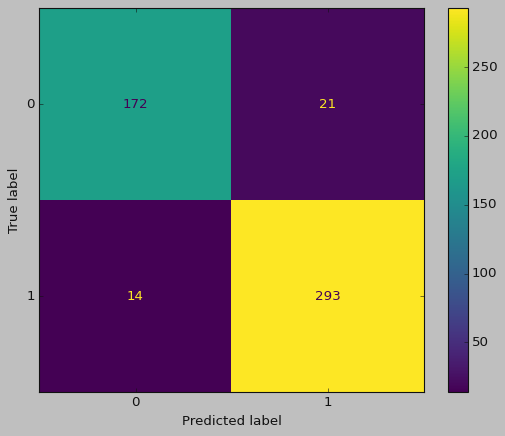

In [39]:
#manuel prediction yapmadan bu fonksiyonun çalıştığından bahset
plot_confusion_matrix(log_model, X_test_scaled, y_test);

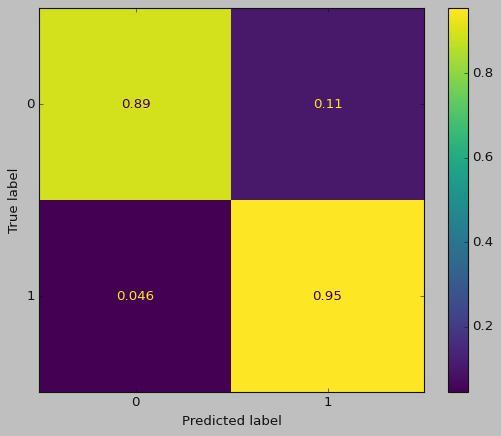

In [40]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [42]:
# pip install yellowbrick

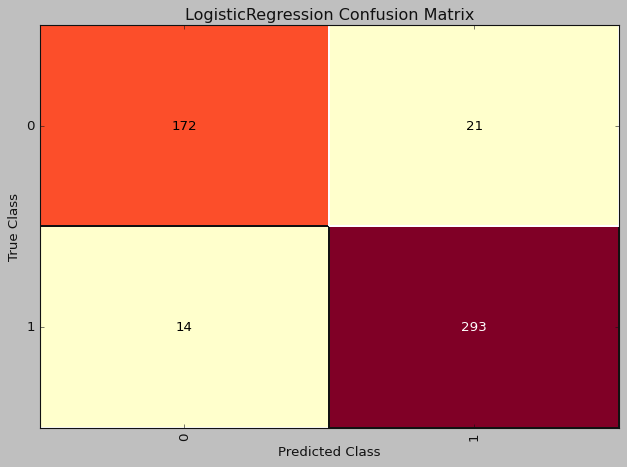

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [43]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(log_model)
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_scaled, y_test)
cm.show()

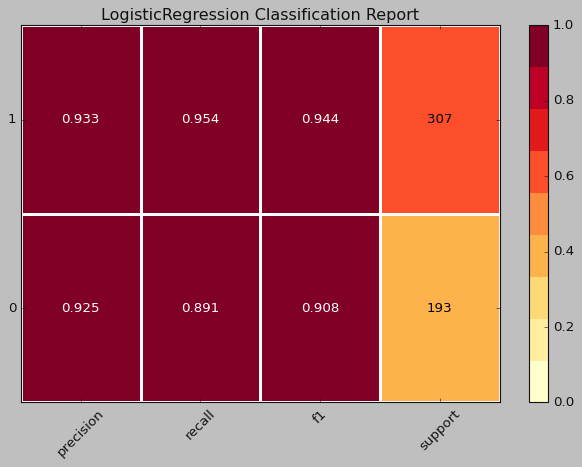

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [44]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show()

## Scores

In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [46]:
accuracy_score(y_test, y_pred)

0.93

In [47]:
log_model.score(X_test_scaled, y_test)

0.93

In [48]:
precision_score(y_test, y_pred)

0.9331210191082803

In [49]:
recall_score(y_test, y_pred)

0.9543973941368078

In [50]:
f1_score(y_test, y_pred, average = "weighted") # average = "macro" 

0.9297480869650194

## Cross Validate

In [51]:
from sklearn.model_selection import cross_val_score, cross_validate

In [52]:
model = LogisticRegression()

scores = cross_val_score(model, X_train_scaled, y_train, cv=10)
print('Cross-Validation Mean of Accuracy Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of Accuracy Scores 0.9146666666666666

[0.9        0.92444444 0.93555556 0.93111111 0.93777778 0.90222222
 0.89777778 0.91111111 0.89111111 0.91555556]


In [53]:
model = LogisticRegression()

scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring="f1_weighted")
print('Cross-Validation Mean of f1_weighted Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of f1_weighted Scores 0.9142157347468058

[0.89891354 0.92405195 0.93485539 0.93101428 0.93765977 0.90261051
 0.89675804 0.91010501 0.89115971 0.91502915]


In [54]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [55]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy',
                                                                   'precision_weighted',
                                                                   'recall_weighted',
                                                                   'f1_weighted'],
                                                                   cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.018,0.008,0.900,0.901,0.900,0.899
2,0.016,0.008,0.924,0.925,0.924,0.924
3,0.020,0.013,0.936,0.938,0.936,0.935
4,0.025,0.009,0.931,0.931,0.931,0.931
5,0.019,0.012,0.938,0.938,0.938,0.938
6,0.025,0.008,0.902,0.904,0.902,0.903
7,0.021,0.010,0.898,0.899,0.898,0.897
8,0.020,0.013,0.911,0.913,0.911,0.910
9,0.017,0.012,0.891,0.891,0.891,0.891
10,0.015,0.013,0.916,0.916,0.916,0.915


In [56]:
df_scores.mean()[2:]

test_accuracy             0.915
test_precision_weighted   0.916
test_recall_weighted      0.915
test_f1_weighted          0.914
dtype: float64

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

Purpose of ROC Curve:
    1. Analysing the strength/predictive power of a classifier.
    2. Determining optimal threshold.
    3. Comparing two models (using Area Under the Curve).

AUC represents a degree or measure of separability. It tells us how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting the probability of class YES higher than the probability of class NO.

The ROC Curve was first used during World War II for the analysis of radar signals. After the attack on Pearl Harbor, the US army began new research to improve the rate of detection of Japanese aircraft from their radar signals. Needless to say, they did not want to miss any of them. Neither did they wish to waste their resources on false alarms. They measured the ability of a radar receiver operator to make these predictions called the Receiver Operating Characteristic. That is the origin of the name. The purpose of the curve was similar to how we use it to improve our machine learning models now. The aim was to analyse the predictive power of the predictor in ensuring the detection of as many true positives as possible while minimizing false positives.

https://towardsdatascience.com/demystifying-roc-curves-df809474529a

In [57]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

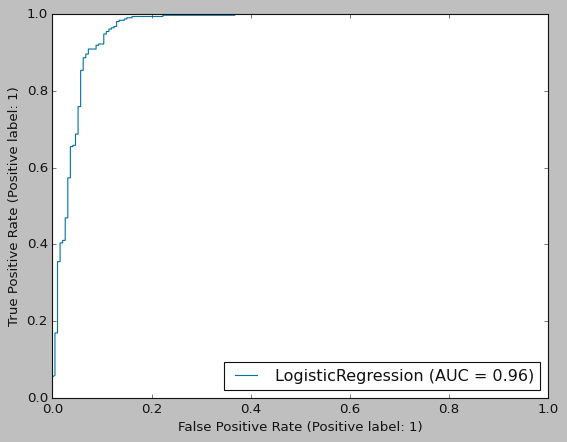

In [58]:
plot_roc_curve(log_model, X_test_scaled, y_test);

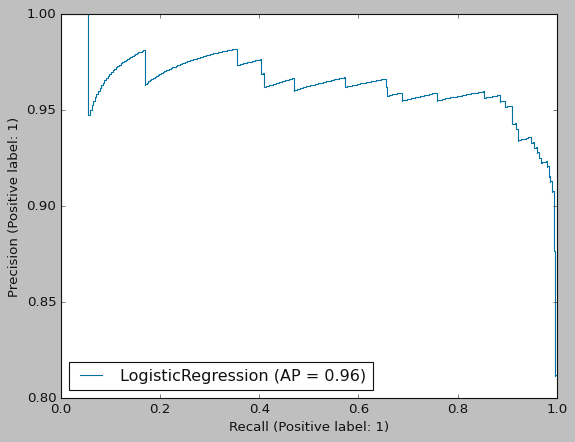

In [59]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

In [60]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9630132824762451

In [61]:
roc_auc_score(y_test, y_pred)

0.9227945519906837

## Finding Best Threshold

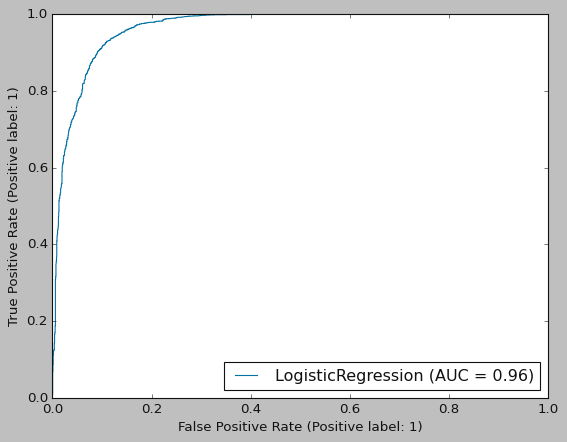

In [62]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [63]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9648803565619611

In [64]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [65]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5801124765321605

In [66]:
roc_curve = {"fp_rate":fp_rate, "tp_rate":tp_rate, "thresholds":thresholds}
df_roc_curve = pd.DataFrame(roc_curve)
df_roc_curve

,fp_rate,tp_rate,thresholds
0,0.000,0.000,2.000
1,0.000,0.000,1.000
2,0.000,0.009,1.000
3,0.001,0.009,1.000
4,0.001,0.009,1.000
...,...,...,...
1491,0.963,1.000,0.000
1492,0.964,1.000,0.000
1493,0.968,1.000,0.000
1494,0.969,1.000,0.000


In [67]:
optimal_idx = np.argmax(df_roc_curve.tp_rate - df_roc_curve.fp_rate)
optimal_threshold = df_roc_curve.thresholds[optimal_idx]
optimal_threshold

0.5801124765321605

In [68]:
df_roc_curve.iloc[optimal_idx]

fp_rate      0.110
tp_rate      0.929
thresholds   0.580
Name: 994, dtype: float64

In [69]:
test_data.head()

,age,physical_score,test_result,pred_proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.025,0


In [70]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [71]:
test_data[(test_data["pred_proba"]>0.4) & (test_data["pred_proba"]<0.6)]

,age,physical_score,test_result,pred_proba,pred,pred2
618,63.000,33.400,1,0.454,0,0
3200,60.000,32.900,1,0.465,0,0
3731,57.000,31.900,1,0.422,0,0
480,41.000,28.600,0,0.410,0,0
1525,46.000,30.700,0,0.527,1,0
3209,61.000,32.600,1,0.412,0,0
172,54.000,32.500,1,0.549,1,0
1379,57.000,32.600,0,0.496,0,0
2415,58.000,33.100,1,0.528,1,0
133,55.000,31.900,0,0.464,0,0


In [72]:
y_pred2 = test_data["pred2"]

In [73]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[173  20]
 [ 22 285]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       193
           1       0.93      0.93      0.93       307

    accuracy                           0.92       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.92      0.92      0.92       500



## Final Model and Model Deployment

In [74]:
scaler = StandardScaler().fit(X)

In [75]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb'))

In [76]:
X_scaled = scaler.transform(X)

In [77]:
final_model = LogisticRegression().fit(X_scaled, y)

In [78]:
pickle.dump(final_model, open("final_model_hearing", 'wb'))

In [79]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [80]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,20,50
1,30,30
2,40,20
3,50,10
4,60,5


In [81]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [82]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [83]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [84]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [85]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,20,50,1,1.000
1,30,30,1,0.730
2,40,20,0,0.016
3,50,10,0,0.000
4,60,5,0,0.000
